In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('IMDb.csv',encoding='latin1')
df

Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                             #Homecoming  (2021)   90 min   Drama, Musical   
3                                 #Yaaram  (2019)  110 min  Comedy, Romance   
4                       ...And Once Again  (2010)  105 min            Drama   
...                                   ...     ...      ...              ...   
15504                 Zulm Ko Jala Doonga  (1988)      NaN           Action   
15505                               Zulmi  (1999)  129 min    Action, Drama   
15506                           Zulmi Raj  (2005)      NaN           Action   
15507                       Zulmi Shikari  (1988)      NaN           Action   
15508                        Zulm-O-Sitam  (1998)  130 min    Action, Drama   

       Rating Votes            Director           Actor 1             Actor 2  \
0         NaN   NaN       J.S. Randhawa          Manmauji              Birbal   
1         7.0     8       Gaurav Bakshi      Rasika Dugal      Vivek Ghamande   
2         NaN   NaN  Soumyajit Majumdar      Sayani Gupta   Plabita Borthakur   
3         4.4    35          Ovais Khan           Prateik          Ishita Raj   
4         NaN   NaN        Amol Palekar      Rajat Kapoor  Rituparna Sengupta   
...       ...   ...                 ...               ...                 ...   
15504     4.6    11       Mahendra Shah  Naseeruddin Shah       Sumeet Saigal   
15505     4.5   655          Kuku Kohli      Akshay Kumar      Twinkle Khanna   
15506     NaN   NaN          Kiran Thej   Sangeeta Tiwari                 NaN   
15507     NaN   NaN                 NaN               NaN                 NaN   
15508     6.2    20        K.C. Bokadia        Dharmendra          Jaya Prada   

               Actor 3  
0      Rajendra Bhatia  
1        Arvind Jangid  
2           Roy Angana  
3      Siddhant Kapoor  
4          Antara Mali  
...                ...  
15504    Suparna Anand  
15505      Aruna Irani  
15506              NaN  
15507              NaN  
15508      Arjun Sarja  

[15509 rows x 10 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [4]:
df.describe()

Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000

In [5]:
df.isnull()


Name   Year  Duration  Genre  Rating  Votes  Director  Actor 1  \
0      False   True      True  False    True   True     False    False   
1      False  False     False  False   False  False     False    False   
2      False  False     False  False    True   True     False    False   
3      False  False     False  False   False  False     False    False   
4      False  False     False  False    True   True     False    False   
...      ...    ...       ...    ...     ...    ...       ...      ...   
15504  False  False      True  False   False  False     False    False   
15505  False  False     False  False   False  False     False    False   
15506  False  False      True  False    True   True     False    False   
15507  False  False      True  False    True   True      True     True   
15508  False  False     False  False   False  False     False    False   

       Actor 2  Actor 3  
0        False    False  
1        False    False  
2        False    False  
3        False    False  
4        False    False  
...        ...      ...  
15504    False    False  
15505    False    False  
15506     True     True  
15507     True     True  
15508    False    False  

[15509 rows x 10 columns]

In [6]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [7]:
df.shape

(15509, 10)

In [8]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [9]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

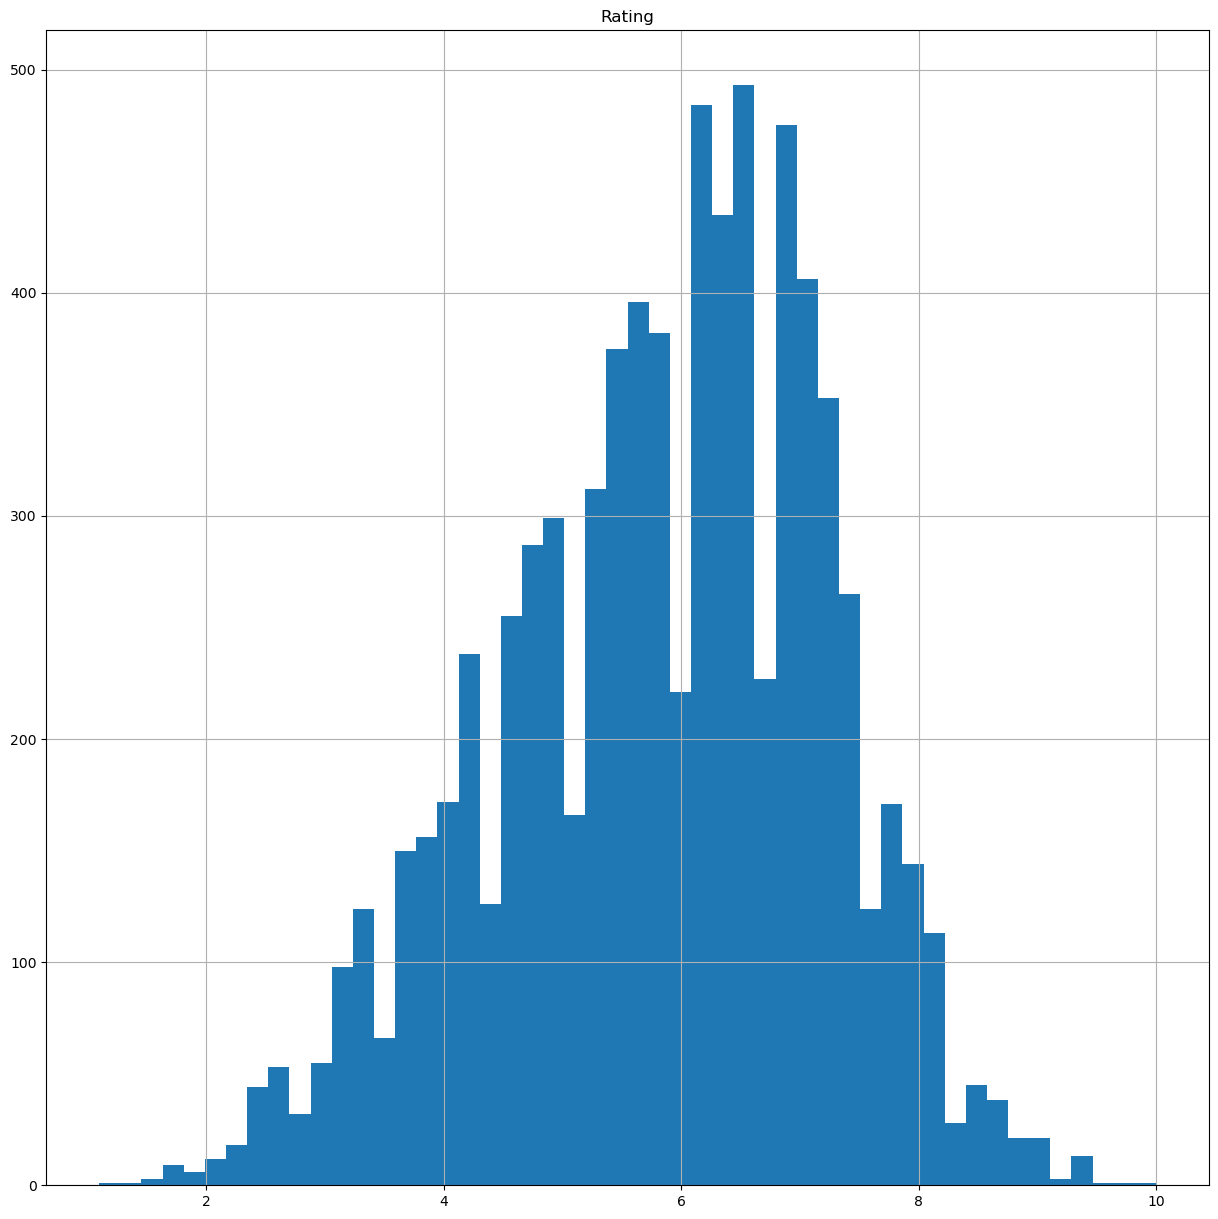

In [10]:
df.hist(bins=50, figsize = (15,15))
plt.show()

In [11]:
def missing_values_percent(dataframe):
    missing_values = dataframe.isna().sum()
    percentage_missing = (missing_values/len(dataframe)*100).round(2)
    rm = pd.DataFrame({'Missing Values': missing_values, 'Percentage': percentage_missing})
    rm["Percentage"] =  rm["Percentage"].astype(str)+"%"
    return rm
result = missing_values_percent(df)
result

Missing Values Percentage
Name                   0       0.0%
Year                 528       3.4%
Duration            8269     53.32%
Genre               1877      12.1%
Rating              7590     48.94%
Votes               7589     48.93%
Director             525      3.39%
Actor 1             1617     10.43%
Actor 2             2384     15.37%
Actor 3             3144     20.27%

In [12]:
df.dropna(subset = ["Duration"],inplace = True)

In [13]:
df.drop(["Actor 2", "Actor 3"], axis = 1, inplace = True)

In [14]:
df = df[df.isnull().sum(axis = 1).sort_values(ascending = False) <= 5]
missing_values_percent(df)

C:\Users\Aishu\AppData\Local\Temp\ipykernel_43644\2996052243.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df.isnull().sum(axis = 1).sort_values(ascending = False) <= 5]


Missing Values Percentage
Name                   0       0.0%
Year                 125      1.73%
Duration               0       0.0%
Genre                187      2.58%
Rating              1389     19.19%
Votes               1389     19.19%
Director              14      0.19%
Actor 1              264      3.65%

In [15]:
df.dropna(subset=['Rating', 'Votes'], inplace=True)
director_description = df['Director'].describe()

director_counts = df['Director'].value_counts().sort_values(ascending=False)
df['Director'].fillna('rajmouli', inplace=True)

genre_counts = df['Genre'].value_counts().sort_values(ascending=False)
df['Genre'].fillna('Action', inplace=True)

actor1_description = df['Actor 1'].describe()
df['Actor 1'].fillna('mahesh babu', inplace=True)

missing_values_df = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})

In [16]:
df.head()

Name    Year Duration  \
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min   
3                             #Yaaram  (2019)  110 min   
5                ...Aur Pyaar Ho Gaya  (1997)  147 min   
6                           ...Yahaan  (2005)  142 min   
8                  ?: A Question Mark  (2012)   82 min   

                       Genre  Rating  Votes        Director          Actor 1  
1                      Drama     7.0      8   Gaurav Bakshi     Rasika Dugal  
3            Comedy, Romance     4.4     35      Ovais Khan          Prateik  
5     Comedy, Drama, Musical     4.7    827    Rahul Rawail       Bobby Deol  
6        Drama, Romance, War     7.4  1,086  Shoojit Sircar  Jimmy Sheirgill  
8  Horror, Mystery, Thriller     5.6    326   Allyson Patel        Yash Dave

In [17]:
df.tail()

Name    Year Duration                      Genre  Rating  \
15493           Zubaan  (2015)  115 min                      Drama     6.1   
15494         Zubeidaa  (2001)  153 min  Biography, Drama, History     6.2   
15503  Zulm Ki Zanjeer  (1989)  125 min       Action, Crime, Drama     5.8   
15505            Zulmi  (1999)  129 min              Action, Drama     4.5   
15508     Zulm-O-Sitam  (1998)  130 min              Action, Drama     6.2   

       Votes         Director         Actor 1  
15493    408      Mozez Singh   Vicky Kaushal  
15494  1,496    Shyam Benegal  Karisma Kapoor  
15503     44  S.P. Muthuraman     Chiranjeevi  
15505    655       Kuku Kohli    Akshay Kumar  
15508     20     K.C. Bokadia      Dharmendra

In [18]:
missing_values_percent(df)

Missing Values Percentage
Name                   0       0.0%
Year                   0       0.0%
Duration               0       0.0%
Genre                  0       0.0%
Rating                 0       0.0%
Votes                  0       0.0%
Director               0       0.0%
Actor 1                0       0.0%

In [19]:
df["Year"] = df["Year"].str.replace(r'[()]', '', regex=True)
df["Duration"] = df["Duration"].str.replace(r' min', '', regex=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5851 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   object 
 2   Duration  5851 non-null   object 
 3   Genre     5851 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   object 
 6   Director  5851 non-null   object 
 7   Actor 1   5851 non-null   object 
dtypes: float64(1), object(7)
memory usage: 411.4+ KB


In [20]:
int_column = ["Year","Duration"]
df[int_column] = df[int_column].astype(int)
df["Votes"] = df["Votes"].str.replace(',','').astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5851 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   int32  
 2   Duration  5851 non-null   int32  
 3   Genre     5851 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   int32  
 6   Director  5851 non-null   object 
 7   Actor 1   5851 non-null   object 
dtypes: float64(1), int32(3), object(4)
memory usage: 342.8+ KB


In [21]:
df.head()

Name  Year  Duration  \
1  #Gadhvi (He thought he was Gandhi)  2019       109   
3                             #Yaaram  2019       110   
5                ...Aur Pyaar Ho Gaya  1997       147   
6                           ...Yahaan  2005       142   
8                  ?: A Question Mark  2012        82   

                       Genre  Rating  Votes        Director          Actor 1  
1                      Drama     7.0      8   Gaurav Bakshi     Rasika Dugal  
3            Comedy, Romance     4.4     35      Ovais Khan          Prateik  
5     Comedy, Drama, Musical     4.7    827    Rahul Rawail       Bobby Deol  
6        Drama, Romance, War     7.4   1086  Shoojit Sircar  Jimmy Sheirgill  
8  Horror, Mystery, Thriller     5.6    326   Allyson Patel        Yash Dave

In [22]:
import plotly.express as px
%matplotlib inline

import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot

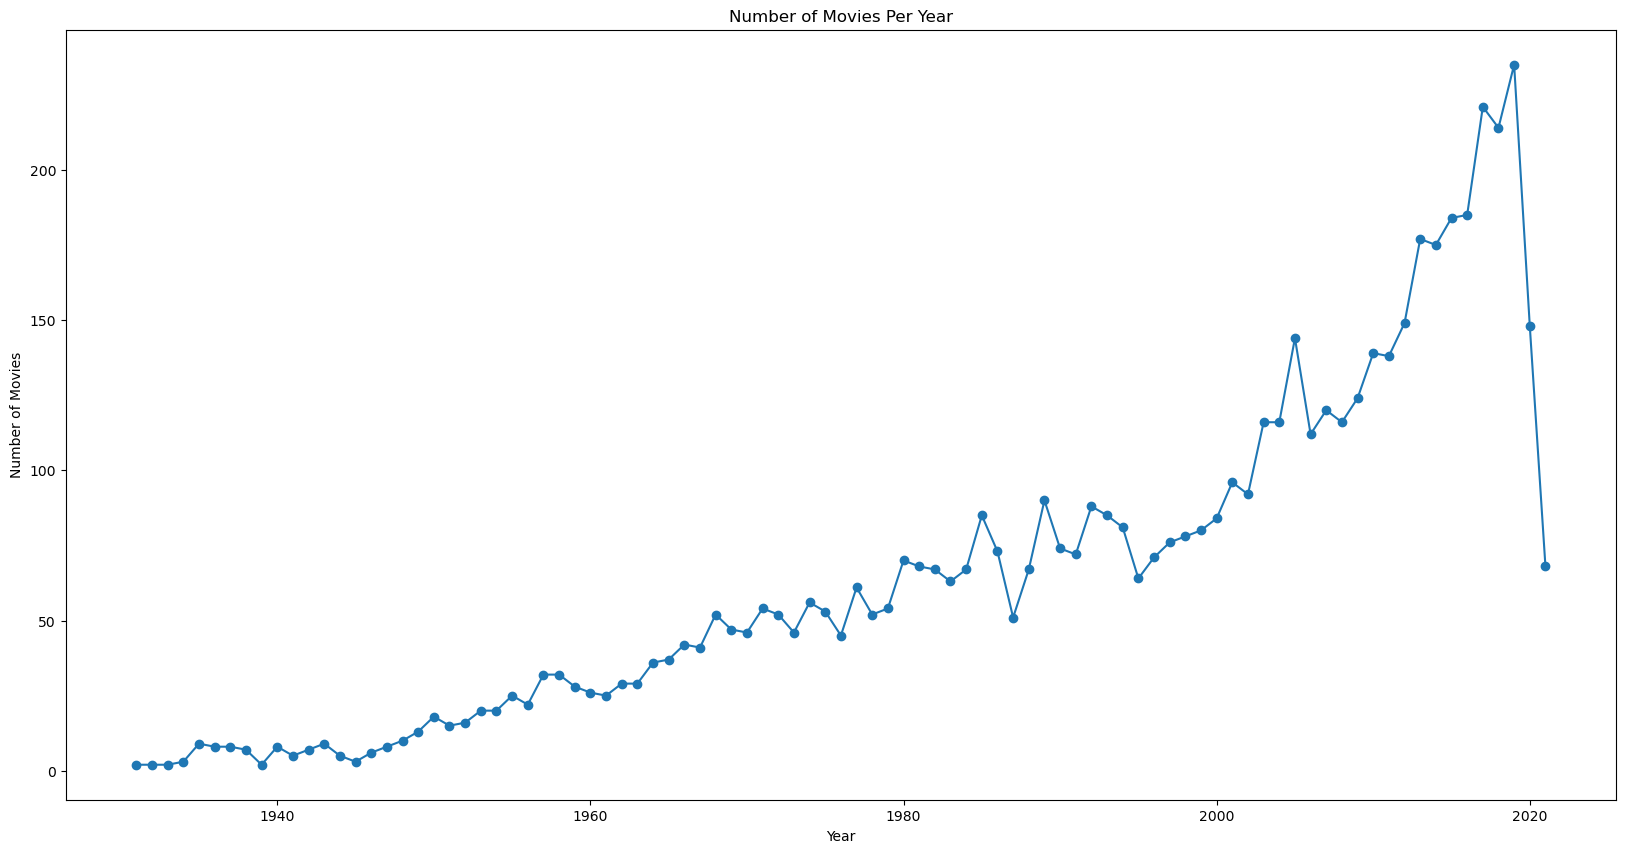

In [23]:
plt.figure(figsize=(20, 10))

year_counts = df['Year'].value_counts().sort_index()
years = year_counts.index

plt.plot(years, year_counts, marker='o' )

plt.title('Number of Movies Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')


plt.show()

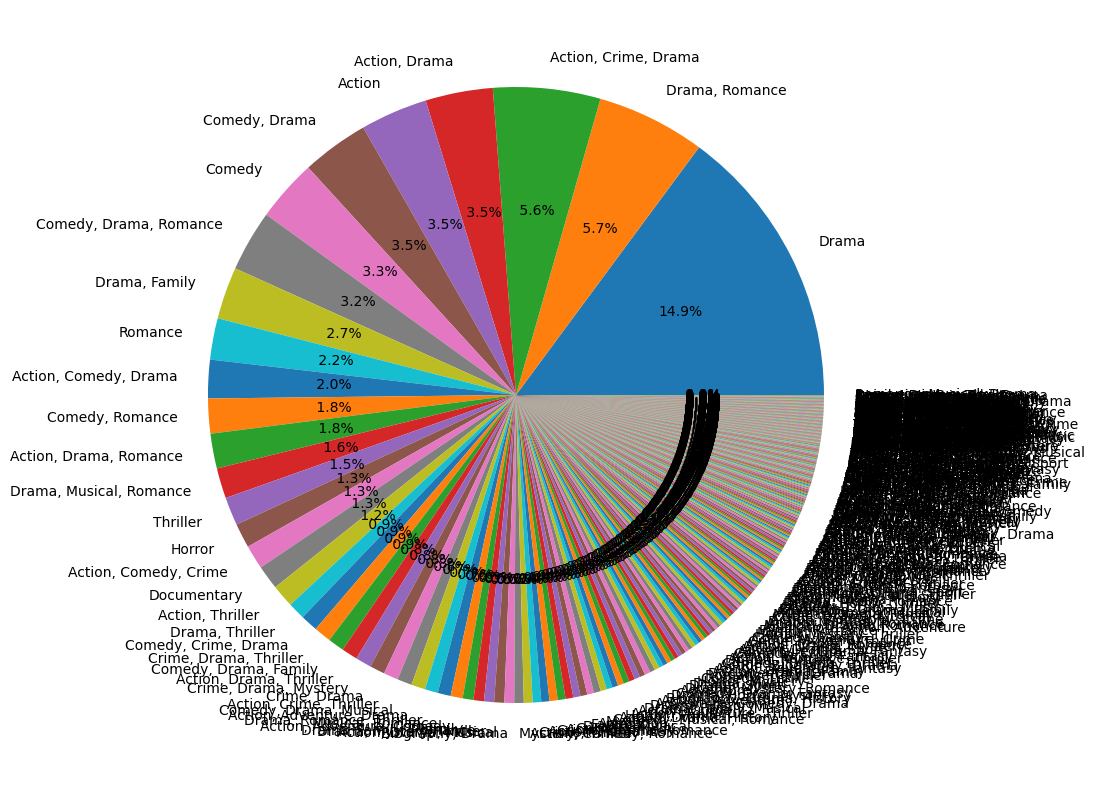

In [24]:
label = df["Genre"].value_counts().index
sizes = df["Genre"].value_counts()
plt.figure(figsize = (10,10))
plt.pie(sizes, labels= label, startangle = 0 , shadow = False , autopct='%4.1f%%')
plt.show()

In [25]:
px.scatter(df,x='Rating',y='Votes',color='Rating',color_continuous_scale=px.colors.sequential.Plasma,title='<b>Rating Versus Votes')

In [26]:
px.scatter(df,x='Rating',y='Duration',color='Rating',color_continuous_scale=px.colors.sequential.Plasma,title='<b>Rating Versus Duration')

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [28]:
genre_mean_rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_mean_rating'] = genre_mean_rating

In [29]:
df['Genre_mean_rating']

1        6.420575
3        5.716822
5        6.242222
6        6.820000
8        5.477778
           ...   
15493    6.420575
15494    6.950000
15503    5.743465
15505    5.526087
15508    5.526087
Name: Genre_mean_rating, Length: 5851, dtype: float64

In [30]:
df['Director_encoded'] = df.groupby('Director')['Rating'].transform('mean')
df['Actor_encoded'] = df.groupby('Actor 1')['Rating'].transform('mean')

In [31]:
df['Actor_encoded']

1        6.850000
3        5.420000
5        4.788889
6        5.435000
8        5.600000
           ...   
15493    6.725000
15494    4.157143
15503    6.307692
15505    5.481707
15508    5.926667
Name: Actor_encoded, Length: 5851, dtype: float64

In [32]:
df['Director_encoded']

1        7.000000
3        4.400000
5        5.313333
6        7.383333
8        5.600000
           ...   
15493    6.100000
15494    7.250000
15503    6.270000
15505    5.225000
15508    4.171429
Name: Director_encoded, Length: 5851, dtype: float64

In [33]:
features = ['Year', 'Votes', 'Duration', 'Genre_mean_rating', 'Director_encoded', 'Actor_encoded']
X = df[features]
y = df['Rating']

In [34]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_train

Year  Votes  Duration  Genre_mean_rating  Director_encoded  \
8400   2014    611       112           6.141176          5.600000   
15159  1985     32       137           5.272816          5.366667   
12256  2007     36        77           6.416875          5.800000   
212    1968    196       175           6.016168          6.785714   
13317  1999    270       169           5.526087          5.950000   
...     ...    ...       ...                ...               ...   
9901   1967     20       158           6.416875          6.600000   
13891  1966    746       159           5.765957          6.980000   
13954  2016     71       130           5.337778          6.800000   
14320  1953     13       140           6.416875          6.863636   
2149   1980     19       154           7.050000          7.100000   

       Actor_encoded  
8400        5.600000  
15159       5.336559  
12256       5.800000  
212         7.029032  
13317       6.307692  
...              ...  
9901        6.540659  
13891       6.919355  
13954       6.800000  
14320       6.914286  
2149        7.100000  

[4680 rows x 6 columns]

In [36]:
y_train

8400     5.6
15159    6.0
12256    5.8
212      6.8
13317    6.5
        ... 
9901     6.3
13891    7.9
13954    6.8
14320    7.3
2149     7.1
Name: Rating, Length: 4680, dtype: float64

In [37]:
X_test

Year  Votes  Duration  Genre_mean_rating  Director_encoded  \
3563   1990    953       130           6.666667          6.900000   
2023   1981     30       121           6.200000          6.300000   
9526   2018     15        84           7.643243          7.900000   
40     2012   1811       124           4.640000          3.775000   
1876   2015    149        80           6.957143          6.100000   
...     ...    ...       ...                ...               ...   
8313   2016    873       114           5.711538          4.803333   
13908  2000    560       143           6.287500          3.000000   
14373  2010    374       122           6.003883          5.100000   
14490  2017  17774       136           6.150000          6.133333   
13028  1979      9       125           6.416875          6.228571   

       Actor_encoded  
3563        5.700000  
2023        5.336559  
9526        7.308000  
40          4.500000  
1876        5.600000  
...              ...  
8313        5.700000  
13908       5.125000  
14373       5.557143  
14490       5.232692  
13028       5.500000  

[1171 rows x 6 columns]

In [38]:
y_test

3563     5.7
2023     6.3
9526     7.9
40       4.8
1876     5.6
        ... 
8313     4.3
13908    3.0
14373    5.1
14490    3.8
13028    5.6
Name: Rating, Length: 1171, dtype: float64

In [39]:
X_train.shape

(4680, 6)

In [40]:
y_train.shape

(4680,)

In [41]:
X_test.shape

(1171, 6)

In [42]:
y_test.shape

(1171,)

In [43]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [44]:
y_pred = lr.predict(X_test)

In [45]:
y_pred

array([6.58520524, 5.94167806, 8.053328  , ..., 5.18901094, 5.84156487,
       6.02286965])

In [46]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [47]:
mse

0.5137989360791347

In [48]:
mae

0.5126665836596419

In [49]:
r2

0.7238406918904581

In [50]:
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")

Mean Squared Error: 0.5138
Mean Absolute Error: 0.5127
R2 Score: 0.7238
